In [15]:
##########################################################################################
############################ PREDICTION WITH ENSEMBLE MODELS #############################
############################## Business Contract Prediction ##############################
##########################################################################################
# Load libraries
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn import metrics

In [16]:
##########################################################################################
##################################### Ensemble Models ###############################
##########################################################################################
# Steps:
#    Load packages
#    Compile user defined functions (here for Confusion matrix & ROC/AUC Plots
#    Read base data & prediction data
#    check basic records
#    Split base data to X, Y
#    Train test split
#    Build Ensemble models: Bagging, Random Forest, Boosting


In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'
set_option('display.width', 90)

In [18]:
################### Read input data
# Input-1: Base or Training Data
filename1 = 'C:\\Users\\pd147\\Downloads\\Premnath\\Python Training\\NearLearn\\NearLearn-Contents_ML with Python_20032018\\6. Advanced ML Algorithm- Vol 2\\Ensemble Models Case Study\\BizContract.csv'
data = read_csv(filename1)
data.shape
data.info()
data.head()


(750, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 12 columns):
Result             750 non-null int64
Product            750 non-null object
PriceDiscount      750 non-null object
Value              750 non-null float64
Priority           750 non-null object
SalesChannel       750 non-null object
Competiton         750 non-null object
Duration_Stage1    750 non-null int64
Duration_Stage2    750 non-null int64
Duration_Stage3    750 non-null int64
Duration_Stage4    750 non-null int64
Duration_Stage5    750 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 70.4+ KB


,Result,Product,PriceDiscount,Value,Priority,SalesChannel,Competiton,Duration_Stage1,Duration_Stage2,Duration_Stage3,Duration_Stage4,Duration_Stage5
0,1,P02,None,617.54,Mid,Direct,Yes,2,2,2,5,2
1,0,P05,High,10000.00,Lowest,Mixed,Yes,0,0,7,7,7
2,0,P09,None,3145.00,Lowest,Direct,Maybe,0,0,9,63,9
3,0,P07,None,100.00,Lowest,Direct,Yes,0,3,12,22,12
4,0,P07,None,900.00,Lowest,Direct,Maybe,36,36,36,108,36


In [19]:
# Input-2: Prediction data
filename2 = 'C:\\Users\\pd147\\Downloads\\Premnath\\Python Training\\NearLearn\\NearLearn-Contents_ML with Python_20032018\\6. Advanced ML Algorithm- Vol 2\\Ensemble Models Case Study\\BizContract_Pred.csv'
pred = read_csv(filename2)
pred.shape
pred.info()
pred.head()

(250, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
Product            250 non-null object
PriceDiscount      250 non-null object
Value              250 non-null float64
Priority           250 non-null object
SalesChannel       250 non-null object
Competiton         250 non-null object
Duration_Stage1    250 non-null int64
Duration_Stage2    250 non-null int64
Duration_Stage3    250 non-null int64
Duration_Stage4    250 non-null int64
Duration_Stage5    250 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 21.6+ KB


,Product,PriceDiscount,Value,Priority,SalesChannel,Competiton,Duration_Stage1,Duration_Stage2,Duration_Stage3,Duration_Stage4,Duration_Stage5
0,P01,None,1620.00,Lowest,Direct,Maybe,2,2,2,6,2
1,P01,None,227.06,Lowest,Direct,Maybe,0,0,0,0,0
2,P01,None,1500.00,Lowest,Direct,Maybe,75,75,75,226,75
3,P01,None,1000.00,Mid,Direct,Maybe,0,0,2,2,2
4,P03,Mid,4020.48,Mid,Mixed,Yes,3,3,3,8,3


In [20]:
# prep data
Y, X = dmatrices('Result~C(Product)+ C(PriceDiscount)+ Value+ C(Priority)+ C(SalesChannel)+ \
                 C(Competiton)+ Duration_Stage1+ Duration_Stage2+ Duration_Stage3+ Duration_Stage4+ Duration_Stage5',
                 data, return_type="dataframe")
print (X.columns)

# flatten y into a 1-D array
Y = np.ravel(Y)

############ Train ~ Test Split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 105)

Index(['Intercept', 'C(Product)[T.P02]', 'C(Product)[T.P03]', 'C(Product)[T.P04]',
       'C(Product)[T.P05]', 'C(Product)[T.P06]', 'C(Product)[T.P07]',
       'C(Product)[T.P08]', 'C(Product)[T.P09]', 'C(Product)[T.P10]',
       'C(Product)[T.P11]', 'C(Product)[T.P12]', 'C(PriceDiscount)[T.Low]',
       'C(PriceDiscount)[T.Mid]', 'C(PriceDiscount)[T.None]',
       'C(PriceDiscount)[T.Very_High]', 'C(Priority)[T.Low]', 'C(Priority)[T.Lowest]',
       'C(Priority)[T.Mid]', 'C(SalesChannel)[T.Indirect]', 'C(SalesChannel)[T.Misc]',
       'C(SalesChannel)[T.Mixed]', 'C(SalesChannel)[T.None]', 'C(Competiton)[T.No]',
       'C(Competiton)[T.Yes]', 'Value', 'Duration_Stage1', 'Duration_Stage2',
       'Duration_Stage3', 'Duration_Stage4', 'Duration_Stage5'],
      dtype='object')


In [21]:
########################################################################################
#################################### Ensemble ##########################################
########################################################################################
# Steps:
#    Fit a bagged tree on train data (after train ~ test split)
#    test on y_test / hold out test sample
#    Check accuracy/auc
#    Do a CV on whole dataset (X, Y)
#    if fine, replicate model-1 on whole X,Y data:
#    use this to predict for final unknown Cases
#    print

# Repeat above steps for:
#    Random Forest
#    Adaptive Boosting
#    Gradient Bossting

In [22]:
########################################################################################
################################# Bagging with Decision Trees Classifier ###############
########################################################################################
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
num_trees = 150    # Count of tree - an input
bag = BaggingClassifier(oob_score=True, base_estimator=dt, n_estimators=num_trees, random_state=105)
bag.fit(X_train,y_train)
y_pred_bag=bag.predict(X_test)

# generate evaluation metrics
probs = bag.predict_proba(X_test)  # generate class probabilities
print (probs)   # Note: Classifier sets Class= 1 when pr. in the second column > 0.5
print (metrics.accuracy_score(y_test, y_pred_bag))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, y_pred_bag))
print (metrics.classification_report(y_test, y_pred_bag))
bag.oob_score_


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=150, n_jobs=1, oob_score=True,
         random_state=105, verbose=0, warm_start=False)

[[0.         1.        ]
 [0.16       0.84      ]
 [0.51333333 0.48666667]
 [0.87333333 0.12666667]
 [0.95333333 0.04666667]
 [0.89333333 0.10666667]
 [0.66666667 0.33333333]
 [0.34666667 0.65333333]
 [0.16       0.84      ]
 [0.4        0.6       ]
 [0.48666667 0.51333333]
 [0.20666667 0.79333333]
 [0.         1.        ]
 [0.45333333 0.54666667]
 [0.04666667 0.95333333]
 [0.         1.        ]
 [0.         1.        ]
 [0.06       0.94      ]
 [0.78       0.22      ]
 [0.91333333 0.08666667]
 [0.36       0.64      ]
 [0.5        0.5       ]
 [0.29333333 0.70666667]
 [0.00666667 0.99333333]
 [0.         1.        ]
 [0.98666667 0.01333333]
 [0.92       0.08      ]
 [0.96666667 0.03333333]
 [0.08666667 0.91333333]
 [0.48666667 0.51333333]
 [0.17411111 0.82588889]
 [0.62666667 0.37333333]
 [0.30833333 0.69166667]
 [0.61333333 0.38666667]
 [0.96666667 0.03333333]
 [0.01333333 0.98666667]
 [1.         0.        ]
 [0.98666667 0.01333333]
 [0.         1.        ]
 [0.96       0.04      ]


0.7485714285714286

Text(0.5,1,'Confusion Matrix on Test Data')

Text(0.5,15,'Predicted')

Text(33,0.5,'Actual')

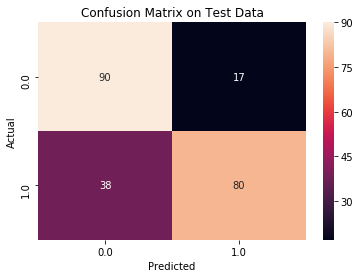

In [23]:
## CF Matrix
import pylab as pl
ax=sns.heatmap(pd.crosstab(y_test, y_pred_bag), annot=True, fmt='.0f')
ax.set_title('Confusion Matrix on Test Data')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.plt.show()

In [24]:
# CV & Evaluate on whole dataset  
kfold = model_selection.KFold(n_splits=10, random_state=105)
bag_results = model_selection.cross_val_score(bag, X, Y, cv=kfold)
print(bag_results.mean())



0.7666666666666666


In [9]:
bag_results

array([0.82666667, 0.74666667, 0.82666667, 0.73333333, 0.76      ,
       0.78666667, 0.77333333, 0.73333333, 0.72      , 0.76      ])

## Random Forest

In [6]:
########################################################################################
################################ Random Forest #########################################
########################################################################################
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

num_trees = 150    #input
max_features = 3   #input
rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=105)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

# generate evaluation metrics
probs = rf.predict_proba(X_test)  # generate class probabilities
print (probs)   # Note: Classifier sets Class= 1 when pr. in the second column > 0.5
print (metrics.accuracy_score(y_test, y_pred_rf))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, y_pred_rf))
print (metrics.classification_report(y_test, y_pred_rf))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=105, verbose=0, warm_start=False)

[[0.01333333 0.98666667]
 [0.18666667 0.81333333]
 [0.56       0.44      ]
 [0.74666667 0.25333333]
 [0.92       0.08      ]
 [0.95333333 0.04666667]
 [0.72666667 0.27333333]
 [0.54666667 0.45333333]
 [0.30666667 0.69333333]
 [0.46       0.54      ]
 [0.44       0.56      ]
 [0.17333333 0.82666667]
 [0.00666667 0.99333333]
 [0.46       0.54      ]
 [0.06       0.94      ]
 [0.07333333 0.92666667]
 [0.02       0.98      ]
 [0.20666667 0.79333333]
 [0.86666667 0.13333333]
 [0.86       0.14      ]
 [0.29333333 0.70666667]
 [0.28666667 0.71333333]
 [0.44       0.56      ]
 [0.02666667 0.97333333]
 [0.02666667 0.97333333]
 [1.         0.        ]
 [0.88       0.12      ]
 [0.84666667 0.15333333]
 [0.09333333 0.90666667]
 [0.41333333 0.58666667]
 [0.20155556 0.79844444]
 [0.85333333 0.14666667]
 [0.25333333 0.74666667]
 [0.68666667 0.31333333]
 [0.99333333 0.00666667]
 [0.17333333 0.82666667]
 [0.99333333 0.00666667]
 [0.98       0.02      ]
 [0.00666667 0.99333333]
 [0.88       0.12      ]


Text(0.5,1,'Confusion Matrix on Test Data')

Text(0.5,15,'Predicted')

Text(33,0.5,'Actual')

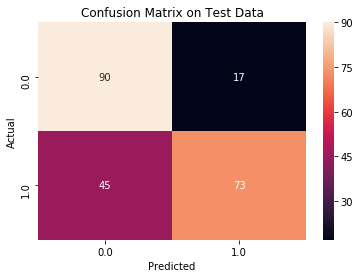

NameError: name 'model_selection' is not defined

In [7]:
#try with other parameter values!
## CF Matrix
import pylab as pl
sns.heatmap(pd.crosstab(y_test, y_pred_rf), annot=True, fmt='.0f')
pl.title('Confusion Matrix on Test Data')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.plt.show()

# CV & Evaluate on whole dataset  
kfold = model_selection.KFold(n_splits=10, random_state=105)
rf_results = model_selection.cross_val_score(rf, X, Y, cv=kfold)
print(rf_results.mean())


### Can further tune the parameters and once done use the same model for Complete/Final Prediction!

In [14]:
########################################################################################
################################ AdaBoost Classification ###############################
########################################################################################
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

num_trees = 30
ada_boost = AdaBoostClassifier(n_estimators=num_trees, random_state=105)
ada_boost.fit(X_train,y_train)
y_pred_adabst=ada_boost.predict(X_test)

# generate evaluation metrics
probs = ada_boost.predict_proba(X_test)  # generate class probabilities
print (probs)   # Note: Classifier sets Class= 1 when pr. in the second column > 0.5
print (metrics.accuracy_score(y_test, y_pred_adabst))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, y_pred_adabst))
print (metrics.classification_report(y_test, y_pred_adabst))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=30, random_state=105)

[[0.4659125  0.5340875 ]
 [0.47918992 0.52081008]
 [0.49895199 0.50104801]
 [0.50791156 0.49208844]
 [0.51513233 0.48486767]
 [0.71406378 0.28593622]
 [0.51204683 0.48795317]
 [0.49120993 0.50879007]
 [0.4764137  0.5235863 ]
 [0.50719364 0.49280636]
 [0.50191598 0.49808402]
 [0.47271404 0.52728596]
 [0.48063941 0.51936059]
 [0.49120993 0.50879007]
 [0.47382631 0.52617369]
 [0.48063941 0.51936059]
 [0.4659125  0.5340875 ]
 [0.49617733 0.50382267]
 [0.50577909 0.49422091]
 [0.51513233 0.48486767]
 [0.49617733 0.50382267]
 [0.47461214 0.52538786]
 [0.49617733 0.50382267]
 [0.45500271 0.54499729]
 [0.48063941 0.51936059]
 [0.71800066 0.28199934]
 [0.45863771 0.54136229]
 [0.51513233 0.48486767]
 [0.46547449 0.53452551]
 [0.49192084 0.50807916]
 [0.49617733 0.50382267]
 [0.82829916 0.17170084]
 [0.48823661 0.51176339]
 [0.49120993 0.50879007]
 [0.71800066 0.28199934]
 [0.48063941 0.51936059]
 [0.53072718 0.46927282]
 [0.71043542 0.28956458]
 [0.47271404 0.52728596]
 [0.45863771 0.54136229]


Text(0.5,1,'Confusion Matrix on Test Data')

Text(0.5,15,'Predicted')

Text(33,0.5,'Actual')

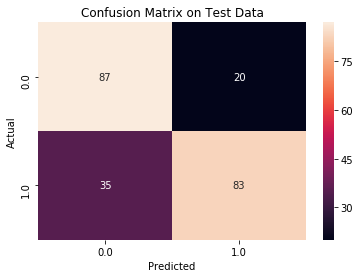

0.7853333333333332


In [15]:
## CF Matrix
import pylab as pl
sns.heatmap(pd.crosstab(y_test, y_pred_adabst), annot=True, fmt='.0f')
pl.title('Confusion Matrix on Test Data')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.plt.show()

# CV & Evaluate on whole dataset  
kfold = model_selection.KFold(n_splits=10, random_state=105)
adabst_results = model_selection.cross_val_score(ada_boost, X, Y, cv=kfold)
print(adabst_results.mean())

### Can further tune the parameters and once done use the same model for Complete/Final Prediction!